In [1]:
# Setup Dependencies

from citipy import citipy
import numpy as np
from config import api_key
import openweathermapy as owm
import requests
import json
from pprint import pprint
import pandas as pd
from urllib.error import HTTPError
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# create a Random list of Geocode coordinates.

lats = np.random.uniform(-90.00,90.00,size =1500)
longs = np.random.uniform(-180.00,180.00,size = 1500)

lat_lng = zip(lats,longs)

# Use citipy module to generate a list of cities corrresponding to the coordinates
Cities = []
for x in lat_lng:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in Cities:
        Cities.append(city)
len(Cities)        

## Set necessary Variables for the API calls
settings = {"units":"imperial","appid":api_key}
Temp = []
Cloud_Index = []
Humidity = []
Wind = []
Latitude = []
City = []
City_Id = []


## API CALL

for locale in Cities:
    try:
        weather = owm.get_current(locale,**settings)
        
        City.append(locale)
        City_Id.append(weather["id"])
        Temp.append(weather["main"]["temp_max"])
        Cloud_Index.append(weather['clouds']['all'])
        Humidity.append(weather['main']['humidity'])
        Wind.append(weather['wind']['speed'])
        Latitude.append(weather['coord']['lat'])
        print([weather['name'],weather['id']])
    except HTTPError:
        pass
    
    
    


['Punta Arenas', 3874787]
['Ushuaia', 3833367]
['Kapaa', 5848280]
['Avarua', 4035715]
['Albany', 5106834]
['Kodiak', 4407665]
['Chumikan', 2025256]
['Rikitea', 4030556]
['Vao', 588365]
['Geraldton', 5960603]
['Jamestown', 2069194]
['Airai', 1651810]
['Nome', 4732862]
['Yellowknife', 6185377]
['Norfolk', 4776222]
['Roald', 3141667]
['Mount Gambier', 2156643]
['Cap Malheureux', 934649]
['Saskylakh', 2017155]
['Pangnirtung', 6096551]
['Hermanus', 3366880]
['Brownsville', 4676740]
['Busselton', 2075265]
['Port Elizabeth', 4501427]
['Chattanooga', 4612862]
['Moron', 3631878]
['Talnakh', 1490256]
['Constitucion', 4011743]
['Guerrero Negro', 4021858]
['Saint George', 262462]
['Nyrob', 516588]
['Mount Isa', 2065594]
['Luderitz', 3355672]
['Fairbanks', 5861897]
['Micoud', 3576569]
['Dikson', 1507390]
['Nouadhibou', 2377457]
['Saint-Philippe', 6138908]
['Khatanga', 2022572]
['Los Llanos de Aridane', 2514651]
['Mitsamiouli', 921786]
['Hobart', 2163355]
['Luanda', 2240449]
['Bambanglipuro', 165043

['Sorong', 1626542]
['Guymon', 5515743]
['Cockburn Town', 3576994]
['Ahipara', 2194098]
['Bambous Virieux', 1106677]
['Ridgecrest', 5387494]
['Takoradi', 2294915]
['Ko Samui', 1154689]
['Tarakeswar', 1254912]
['Inzhavino', 556275]
['Hit', 95788]
['Cabedelo', 3404558]
['Daru', 2409663]
['Mezen', 527321]
['Hami', 1529484]
['Naberera', 152042]
['Ochamchira', 612652]
['Solnechnyy', 2016307]
['Mandera', 187896]
['Ulvik', 3133311]
['Labuhan', 1641899]
['Pochutla', 3517970]
['Lillooet', 6945979]
['Alta Floresta', 6316343]
['Kavieng', 2094342]
['San Cristobal', 3652462]
['Yanam', 1252795]
['Mandalgovi', 2030065]
['Padang', 1633419]
['Niquero', 3545981]
['Carlagan', 1718367]
['Ilam', 130802]
['Marilia', 3397900]
['Eureka', 5563397]
['Xai-Xai', 1024552]
['Maturin', 3778045]
['Mindelo', 2739997]
['Owando', 2255542]
['Susangerd', 137268]
['Nokha', 1261227]
['Tabou', 2281120]
['Rio Grande', 3451138]
['Gizo', 6693679]
['Clyde River', 5924351]
['Kassala', 372753]
['Praia da Vitoria', 3372760]
['Rio G

In [3]:
## Create DataFrame from the collected DATA from the API CALL

weather_dict = {"City":City,"City_Id":City_Id,"Latitude":Latitude,"Temperature":Temp,"Cloud_Index":Cloud_Index,"Humidity":Humidity,"Wind":Wind}
weather_df = pd.DataFrame(weather_dict)

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 7 columns):
City           535 non-null object
City_Id        535 non-null int64
Latitude       535 non-null float64
Temperature    535 non-null float64
Cloud_Index    535 non-null int64
Humidity       535 non-null int64
Wind           535 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 29.3+ KB


In [43]:
## write to a csv file and call head on the df
weather_df.to_csv("Json_homework_api_data.csv")
weather_df.head()



,City,City_Id,Latitude,Temperature,Cloud_Index,Humidity,Wind
0,punta arenas,3874787,-53.16,48.20,40,49,32.21
1,ushuaia,3833367,-54.81,44.60,75,75,38.03
2,kapaa,5848280,22.08,66.92,1,83,9.17
3,avarua,4035715,-21.21,78.80,75,74,13.87
4,albany,5106834,42.65,42.98,75,75,14.99


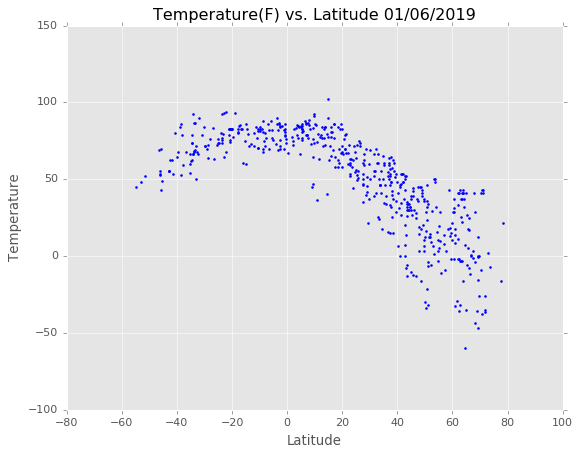

In [11]:
## setting up plots
plt.style.use("ggplot")
for i in range(0,len(weather_df)):
    y= weather_df.loc[i]["Temperature"]
    x = weather_df.loc[i]["Latitude"]
    plt.scatter(x,y,color = "blue",s= 3)
plt.title("Temperature(F) vs. Latitude 01/06/2019")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Temp vs Lat.png") 
plt.show()
## Observations: Clearly as we already knew the temperature is higher near the equator. 
## What's pretty clear in this plot and not so much in the others is the population density.. or at least 
## number of cities in the norther hemisphere vs southern. Lotta open water and not much land mass south of -60 deg. 

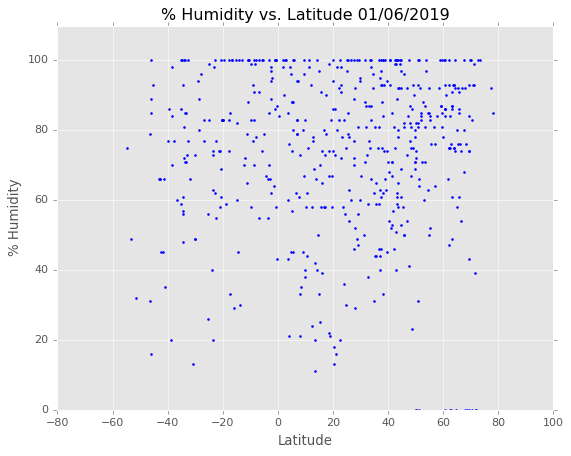

In [12]:
for i in range(0,len(weather_df)):
    y= weather_df.loc[i]["Humidity"]
    x = weather_df.loc[i]["Latitude"]
    plt.scatter(x,y,color = "blue",s= 3)
plt.title("% Humidity vs. Latitude 01/06/2019")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.ylim(0,110)
plt.savefig("Humidity vs. Lat.png")
plt.show()
### this made me wonder what kind of relationship you would see between temp and humidity.. so let's take a peek
## see below last required fig. 

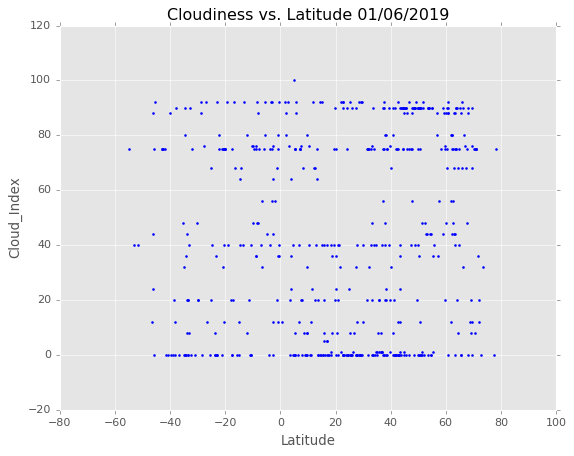

In [13]:
for i in range(0,len(weather_df)):
    y= weather_df.loc[i]["Cloud_Index"]
    x = weather_df.loc[i]["Latitude"]
    plt.scatter(x,y,color = "blue",s= 3)
plt.title("Cloudiness vs. Latitude 01/06/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloud_Index")
plt.savefig("Cloud_Index vs. Lat.png")
plt.show()


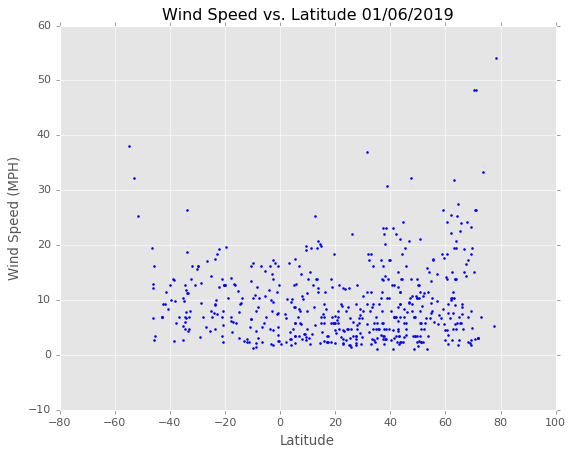

In [14]:
for i in range(0,len(weather_df)):
    y= weather_df.loc[i]["Wind"]
    x = weather_df.loc[i]["Latitude"]
    plt.scatter(x,y,color = "blue",s= 3)
plt.title("Wind Speed vs. Latitude 01/06/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("Wind Speed vs. Lat.png")
plt.show()


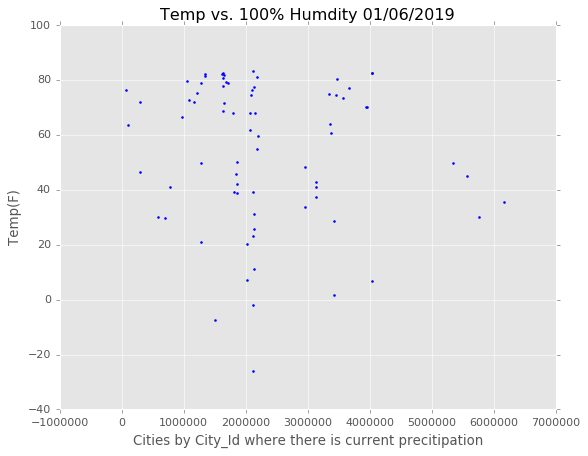

43

In [53]:
x = []
y = []

for i in range(0,len(weather_df)):
    if weather_df.loc[i].Humidity == 100:
        x.append(weather_df.loc[i].City_Id)
        y.append(weather_df.loc[i].Temperature)
    else:
        next
plt.scatter(x,y,color = "blue", s = 3)
plt.title("Temp vs. 100% Humdity 01/06/2019")
plt.xlabel("Cities by City_Id where there is current precitipation")
plt.ylabel("Temp(F)")
#plt.savefig("Temp(F)")
plt.show()



## OK looks like more precpitation in warmer locales, but then again there may not be as many cooler locales so 
## below we did a couple more calcualtions and did a bar plot. 

<BarContainer object of 3 artists>

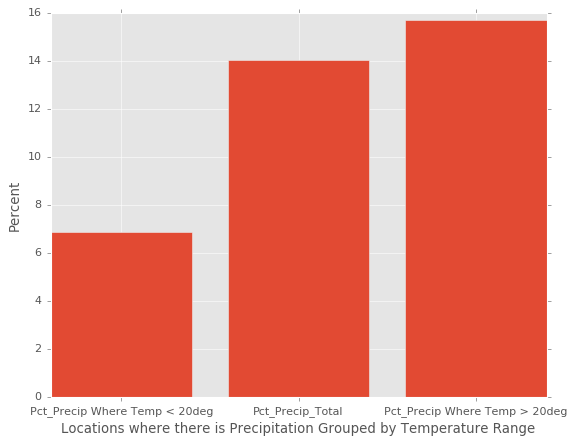

In [95]:
Pct_Precip_Total = round(len(weather_df[weather_df.Humidity==100])/len(weather_df)*100,2)

Pct_Precip_less_20 = round(len(weather_df[(weather_df.Humidity == 100)& (weather_df.Temperature < 20)])/len(weather_df[weather_df.Temperature<20])*100,2)

Pct_Precip_over_20 =round(len(weather_df[(weather_df.Humidity == 100)& (weather_df.Temperature > 20)])/len(weather_df[weather_df.Temperature>20])*100,2)



y = [Pct_Precip_less_20,Pct_Precip_Total,Pct_Precip_over_20]
x = np.arange(3)
plt.xticks(x,('Pct_Precip Where Temp < 20deg','Pct_Precip_Total','Pct_Precip Where Temp > 20deg'))
plt.ylabel("Percent")
plt.xlabel("Locations where there is Precipitation Grouped by Temperature Range")
plt.bar(x,height=y)


In [92]:
## Nearly 16% of locations where the temp is over 20 degrees and Humidity is 100% vs. under 7% of locations where the temp
# is less than 20 and humdity is 100% so it does at least appear more likely to have precipitation in warmer locales. 
